In [18]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv  file containing the dataset
df=pd.read_csv("StudentsPerformance.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [4]:
#checking for null values and displaying concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [6]:
#renaming the column names and hence replacing space(" ") by underscore("_")
column_names=df.columns
for column in column_names:
    new_name=column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
#displaying the discriptive  statistics of the dataset reardless of the datatype.
df.describe(include="all")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.001000,69.195000,68.119000
std,NaN,NaN,NaN,NaN,NaN,15.569567,14.706436,15.226381
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.250000,79.000000


# 1. Finding out how many males and females participated in the test.

Text(0.5, 1.0, 'Count of Male and Female Particpants')

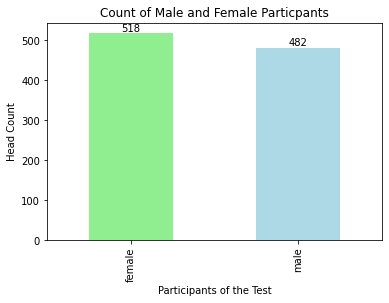

In [9]:
#displaying the count of each value present in the column 'gender'
ax=df.gender.value_counts().plot.bar(color=['lightgreen', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Participants of the Test")
plt.ylabel("Head Count")
plt.title("Count of Male and Female Particpants")

From the above graph we can understand that 518 female and 482 male are participated in the test

# 2. What do you think about the students' parental level of education?

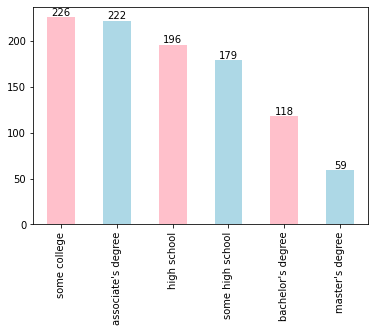

In [10]:
#displaying the chart on parental level of education
ax=df.parental_level_of_education.value_counts().plot.bar(color=['pink','lightblue'])
for container in ax.containers:
    ax.bar_label(container)

This is the students parential level of education.we can understand stand that comparitivelly all are educated.

# 3. Who scores the most on average for math, reading and writing based on:

<h3>● Gender
    
● Test preparation course</h3>

In [9]:
#calculating the average of the math score, reading score and writing score
df['average']=df.mean(axis = 1, skipna = True)

In [10]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
5,female,group B,high school,free/reduced,completed,23,44,36,34.333333
6,female,group B,some high school,free/reduced,none,24,38,27,29.666667
7,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
8,female,group D,some high school,free/reduced,none,19,34,32,28.333333
9,female,group C,high school,standard,none,29,29,30,29.333333


<h5>Grouped by Gender</h5>

In [11]:
#Calculating the maximum value of the average when grouped by gender
df.groupby('gender')['average'].max()

gender
female    100.0
male      100.0
Name: average, dtype: float64

<h5>Grouped by Test Preparation Course</h5>

In [12]:
#Calculating the maximum value of the average when grouped by test preparation course
df.groupby('test_preparation_course')['average'].max()

test_preparation_course
completed    100.0
none         100.0
Name: average, dtype: float64

In [13]:
#displaying the student records containing the highest average marks
df[(df['average']==100.0)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
516,female,group E,bachelor's degree,standard,none,100,100,100,100.0
517,female,group E,associate's degree,standard,none,100,100,100,100.0
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.0


The above is the filitered dataset of student scores with the maximum average scores of maths reading and writing

### 4. What do you think about the scoring variation for math, reading and writing based on

### i) Gender

In [22]:
df.groupby('gender')['math_score'].mean()

gender
female    63.376448
male      68.821577
Name: math_score, dtype: float64

In [23]:
df.groupby('gender')['math_score'].std()

gender
female    16.029928
male      14.556411
Name: math_score, dtype: float64

In [24]:
df.groupby('gender')['reading_score'].mean()

gender
female    72.590734
male      65.545643
Name: reading_score, dtype: float64

In [15]:
df.groupby('gender')['reading_score'].std()

gender
female    14.411018
male      14.149594
Name: reading_score, dtype: float64

In [26]:
df.groupby('gender')['writing_score'].mean()

gender
female    72.467181
male      63.446058
Name: writing_score, dtype: float64

In [27]:
df.groupby('gender')['writing_score'].std()

gender
female    14.844842
male      14.227225
Name: writing_score, dtype: float64

From the mean and standard deviation for writing score based on gender we can see that variation in reading score for female students is equal when compared to male students since the standard deviation for female students is equal to that for male students. Or we can say that the data is equally dispersed in the case of female students and male students.

### ii) Test Preparation Course

In [33]:
df.groupby('test_preparation_course')['math_score'].mean()

test_preparation_course
completed    69.96648
none         63.78972
Name: math_score, dtype: float64

In [34]:
df.groupby('test_preparation_course')['math_score'].std()

test_preparation_course
completed    14.521847
none         15.705689
Name: math_score, dtype: float64

In [35]:
df.groupby('test_preparation_course')['reading_score'].mean()

test_preparation_course
completed    74.175978
none         66.417445
Name: reading_score, dtype: float64

In [36]:
df.groupby('test_preparation_course')['reading_score'].std()

test_preparation_course
completed    13.537572
none         14.608896
Name: reading_score, dtype: float64

In [37]:
df.groupby('test_preparation_course')['writing_score'].mean()

test_preparation_course
completed    74.684358
none         64.457944
Name: writing_score, dtype: float64

In [16]:
df.groupby('test_preparation_course')['writing_score'].std()

test_preparation_course
completed    13.236412
none         15.041667
Name: writing_score, dtype: float64

When looking at the above output we can see that the standard deviation for writing score grouped by test preparation course for completed students are lower than that for unattended students.

### 5. Bonus to top 25% of students based on maths score

In [45]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
df.math_score.quantile(0.75)

In [47]:
df[(df['math_score']>=df.math_score.quantile(0.75))]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
419,female,group C,bachelor's degree,standard,none,77,88,87
420,female,group C,bachelor's degree,standard,completed,77,94,95
421,female,group C,some college,free/reduced,none,77,90,91
422,female,group C,some high school,standard,completed,77,90,85
423,female,group C,some high school,standard,none,77,91,88


We found that the 75% quartile value starts from 77.0 for math score which means the values in the 3rd quartile is on and above 77.0 and hence displaying the top 25% of the students who scored well in maths.